In [88]:
import pandas as pd
import sklearn as metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm


In [89]:
train_data=pd.read_csv(r'C:\Users\1\Desktop\1\Property_Price_Train.csv')
train_data.tail()
test_data=pd.read_csv(r'C:\Users\1\Desktop\1\Property_Price_Test.csv')


In [90]:
Sale_Price=train_data['Sale_Price']
Sale_Price
test_data['Sale_Price']=Sale_Price
test_data["Sale_Price"]='0'
test_data.shape
test_data.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


In [91]:
all=train_data.append(test_data)
all.dtypes

Id                  int64
Building_Class      int64
Zoning_Class       object
Lot_Extent        float64
Lot_Size          float64
                   ...   
Month_Sold          int64
Year_Sold           int64
Sale_Type          object
Sale_Condition     object
Sale_Price         object
Length: 81, dtype: object

In [92]:
all.Sale_Price=all.Sale_Price.astype("int")

In [93]:
Life_House=all['Remodel_Year']-all['Construction_Year']
all['Life_House']=Life_House
all=all.drop(['Remodel_Year','Construction_Year','Garage_Built_Year','Garage_Finish_Year',"Id"],axis=1)# nunique columns drop

In [94]:
all.shape

(2918, 77)

In [95]:
all.Lane_Type=all.Lane_Type.fillna('other')
all.Basement_Height=all.Basement_Height.fillna("other")
all.Basement_Condition=all.Basement_Condition.fillna("other")


In [96]:
all.Exposure_Level=all.Exposure_Level.fillna("other")
all.BsmtFinType1=all.BsmtFinType1.fillna("other")
all.BsmtFinType2=all.BsmtFinType2.fillna("other")


In [97]:
all.Fireplace_Quality=all.Fireplace_Quality.fillna("other")
all.Garage=all.Garage.fillna("other")
all.Garage_Condition=all.Garage_Condition.fillna("other")


In [98]:
all.Garage_Quality=all.Garage_Quality.fillna("other")
all.Pool_Quality=all.Pool_Quality.fillna("other")

In [99]:
all.Fence_Quality=all.Fence_Quality.fillna("other")
all.Miscellaneous_Feature=all.Miscellaneous_Feature.fillna("other")

In [100]:
all=all.drop([ "Miscellaneous_Feature","Pool_Quality","Month_Sold","Year_Sold"],axis=1)# nunique columns drop

In [101]:
all.shape

(2918, 73)

In [102]:
all.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Fence_Quality,Miscellaneous_Value,Sale_Type,Sale_Condition,Sale_Price,Life_House
0,60,RLD,65.0,8450.0,Paved,other,Reg,Lvl,AllPub,I,...,20.337934,0,0,0,other,0,WD,Normal,208500,0
1,20,RLD,80.0,9600.0,Paved,other,Reg,Lvl,AllPub,FR2P,...,15.039392,0,0,0,other,0,WD,Normal,181500,0
2,60,RLD,68.0,11250.0,Paved,other,IR1,Lvl,AllPub,I,...,-46.232198,0,0,0,other,0,WD,Normal,223500,1
3,70,RLD,60.0,9550.0,Paved,other,IR1,Lvl,AllPub,C,...,60.921821,0,0,0,other,0,WD,Abnorml,140000,55
4,60,RLD,84.0,14260.0,Paved,other,IR1,Lvl,AllPub,FR2P,...,21.788818,0,0,0,other,0,WD,Normal,250000,0


In [103]:
all_nas=100*all.isnull().sum()/len(all)
all_nas.sort_values(ascending=False)


Lot_Extent                   16.655243
Brick_Veneer_Type             0.822481
Brick_Veneer_Area             0.788211
Zoning_Class                  0.137080
Underground_Half_Bathroom     0.068540
                               ...    
First_Floor_Area              0.000000
Air_Conditioning              0.000000
Heating_Quality               0.000000
Sale_Price                    0.000000
Building_Class                0.000000
Length: 73, dtype: float64

In [104]:

all.columns[all.isnull().any()]


Index(['Zoning_Class', 'Lot_Extent', 'Utility_Type', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Electrical_System',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Kitchen_Quality', 'Functional_Rate', 'Garage_Size', 'Garage_Area',
       'Sale_Type'],
      dtype='object')

In [105]:
all.Zoning_Class=all.Zoning_Class.fillna('RLD')
all.Lot_Extent=all.Lot_Extent.fillna(all.Lot_Extent.mean())
all.Utility_Type=all.Utility_Type.fillna('AllPub')
all.Brick_Veneer_Type=all.Brick_Veneer_Type.fillna('Stone')
all.Brick_Veneer_Area=all.Brick_Veneer_Area.fillna(all.Brick_Veneer_Area.mean())
all.Exterior1st=all.Exterior1st.fillna('VinylSd')
all.Exterior2nd=all.Exterior2nd.fillna('VinylSd')

all.BsmtFinSF1=all.BsmtFinSF1.fillna(all.BsmtFinSF1.mean())
all.BsmtFinSF2=all.BsmtFinSF2.fillna(all.BsmtFinSF2.mean())
all.BsmtUnfSF=all.BsmtUnfSF.fillna(all.BsmtUnfSF.mean())
all.Total_Basement_Area=all.Total_Basement_Area.fillna(all.Total_Basement_Area.mean())
all.Electrical_System=all.Electrical_System.fillna('SBrkr')
all.Underground_Full_Bathroom=all.Underground_Full_Bathroom.fillna('0')
all.Underground_Half_Bathroom=all.Underground_Half_Bathroom.fillna('0')
all.Kitchen_Quality=all.Kitchen_Quality.fillna('TA')


all.Sale_Type=all.Sale_Type.fillna('WD')                                                
all.Garage_Area=all.Garage_Area.fillna(all.Garage_Area.mean())
all.Garage_Size=all.Garage_Size.fillna(all.Garage_Size.mean())
all.Functional_Rate=all.Functional_Rate.fillna('TF')

In [106]:
all_numeric = all.select_dtypes(include=[np.number])
all_numeric.shape

(2918, 31)

In [107]:
all_numeric.iloc[:,21:31]

,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Price,Life_House
0,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,208500,0
1,196.316304,198.900074,74.716033,15.039392,0,0,0,0,181500,0
2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,223500,1
3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,140000,55
4,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,250000,0
...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0
1455,286.000000,0.000000,24.000000,0.000000,0,0,0,0,0,0
1456,576.000000,474.000000,0.000000,0.000000,0,0,0,0,0,36
1457,0.000000,80.000000,32.000000,0.000000,0,0,0,700,0,0


In [108]:
all_cat = all.select_dtypes(exclude=[np.number])
#all1_numeric.head()
#all_cat.head()
all_numeric.shape,all_cat.shape

((2918, 31), (2918, 42))

In [109]:
all_cat.iloc[:,0:10]

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1
0,RLD,Paved,other,Reg,Lvl,AllPub,I,GS,CollgCr,Norm
1,RLD,Paved,other,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr
2,RLD,Paved,other,IR1,Lvl,AllPub,I,GS,CollgCr,Norm
3,RLD,Paved,other,IR1,Lvl,AllPub,C,GS,Crawfor,Norm
4,RLD,Paved,other,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm
...,...,...,...,...,...,...,...,...,...,...
1454,RMD,Paved,other,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD
1455,RMD,Paved,other,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD
1456,RLD,Paved,other,Reg,Lvl,AllPub,I,GS,Mitchel,Norm
1457,RLD,Paved,other,Reg,Lvl,AllPub,I,GS,Mitchel,Norm


In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
all_cat.Zoning_Class=le.fit_transform(all_cat.Zoning_Class)
all_cat.Road_Type=all_cat.replace({"Road_Type":{"Grvl":1,"Pave":0}})
#all_cat.Lane_Type=le.fit_transform(all_cat.Lane_type)
all_cat.Property_Shape=le.fit_transform(all_cat.Property_Shape)
all_cat.Land_Outline=le.fit_transform(all_cat.Land_Outline)
all_cat.Utility_Type=le.fit_transform(all_cat.Utility_Type)
all_cat.Lot_Configuration=le.fit_transform(all_cat.Lot_Configuration)
all_cat.Property_Slope=le.fit_transform(all_cat.Property_Slope)
all_cat.Neighborhood=le.fit_transform(all_cat.Neighborhood)
all_cat.Condition1=le.fit_transform(all_cat.Condition1)

all_cat.Lane_Type=all_cat.replace({"Lane_Type":{"Grvl":1,"Paved":0,"other":2}})


C:\Users\1\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [111]:
all_cat.iloc[:,10:20]

,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition
0,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA
1,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA
2,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA
3,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA
4,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA
...,...,...,...,...,...,...,...,...,...,...
1454,NoRMD,Twnhs,2Story,Gable,SS,CemntBd,CmentBd,None,TA,TA
1455,NoRMD,TwnhsE,2Story,Gable,SS,CemntBd,CmentBd,None,TA,TA
1456,Norm,1Fam,1Story,Gable,SS,VinylSd,VinylSd,None,TA,TA
1457,Norm,1Fam,SFoyer,Gable,SS,HdBoard,Wd Shng,None,TA,TA


In [112]:
all_cat.Condition2=le.fit_transform(all_cat.Condition2)
all_cat.House_Type=le.fit_transform(all_cat.House_Type)
all_cat.House_Design=le.fit_transform(all_cat.House_Design)
all_cat.Roof_Design=le.fit_transform(all_cat.Roof_Design)
all_cat.Roof_Quality=le.fit_transform(all_cat.Roof_Quality)
all_cat.Exterior1st=le.fit_transform(all_cat.Exterior1st)
all_cat.Exterior2nd=le.fit_transform(all_cat.Exterior2nd)
all_cat.Brick_Veneer_Type=le.fit_transform(all_cat.Brick_Veneer_Type)
all_cat.Exterior_Material=le.fit_transform(all_cat.Exterior_Material)
all_cat.Exterior_Condition=le.fit_transform(all_cat.Exterior_Condition)



In [113]:
all_cat.iloc[:,20:30]

,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System
0,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr
1,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr
2,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr
3,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr
4,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr
...,...,...,...,...,...,...,...,...,...,...
1454,CB,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr
1455,CB,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr
1456,CB,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr
1457,PC,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr


In [114]:
all_cat.Foundation_Type=le.fit_transform(all_cat.Foundation_Type)
all_cat.Basement_Height=le.fit_transform(all_cat.Basement_Height)
all_cat.Basement_Condition=le.fit_transform(all_cat.Basement_Condition)
all_cat.Exposure_Level=le.fit_transform(all_cat.Exposure_Level)
all_cat.BsmtFinType1=le.fit_transform(all_cat.BsmtFinType1)
all_cat.BsmtFinType2=le.fit_transform(all_cat.BsmtFinType2)
all_cat.Heating_Type=le.fit_transform(all_cat.Heating_Type)
all_cat.Heating_Quality=le.fit_transform(all_cat.Heating_Quality)
all_cat.Electrical_System=le.fit_transform(all_cat.Electrical_System)

all_cat=all_cat.replace({"Air_Conditioning":{"Y":1,"N":0}})


In [115]:
all_cat.iloc[:,30:43]

,Underground_Full_Bathroom,Underground_Half_Bathroom,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Quality,Garage_Condition,Pavedd_Drive,Fence_Quality,Sale_Type,Sale_Condition
0,1,0,Gd,TF,other,Attchd,TA,TA,Y,other,WD,Normal
1,0,1,TA,TF,TA,Attchd,TA,TA,Y,other,WD,Normal
2,1,0,Gd,TF,TA,Attchd,TA,TA,Y,other,WD,Normal
3,1,0,Gd,TF,Gd,Detchd,TA,TA,Y,other,WD,Abnorml
4,1,0,Gd,TF,TA,Attchd,TA,TA,Y,other,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,TA,TF,other,other,other,other,Y,other,WD,NoRMDal
1455,0,0,TA,TF,other,CarPort,TA,TA,Y,other,WD,AbnoRMDl
1456,1,0,TA,TF,TA,Detchd,TA,TA,Y,other,WD,Abnorml
1457,0,1,TA,TF,other,other,other,other,Y,MnPrv,WD,Normal


In [116]:
all_cat.Kitchen_Quality=le.fit_transform(all_cat.Kitchen_Quality)
all_cat.Functional_Rate=le.fit_transform(all_cat.Functional_Rate)
all_cat.Fireplace_Quality=le.fit_transform(all_cat.Garage)
all_cat.Garage=le.fit_transform(all_cat.Garage)
all_cat.Garage_Quality=le.fit_transform(all_cat.Garage_Quality)
all_cat.Garage_Condition=le.fit_transform(all_cat.Garage_Condition)
all_cat.Pavedd_Drive=le.fit_transform(all_cat.Pavedd_Drive)
all_cat.Fence_Quality=le.fit_transform(all_cat.Pavedd_Drive)
all_cat.Sale_Type=le.fit_transform(all_cat.Sale_Type)
all_cat.Sale_Condition=le.fit_transform(all_cat.Sale_Condition)



In [117]:
all_cat.shape

(2918, 42)

In [118]:
all_cat

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,...,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Quality,Garage_Condition,Pavedd_Drive,Fence_Quality,Sale_Type,Sale_Condition
0,3,3,3,3,3,0,4,0,5,3,...,2,9,2,2,4,4,2,2,8,6
1,3,3,3,3,3,0,2,0,24,1,...,3,9,2,2,4,4,2,2,8,6
2,3,3,3,0,3,0,4,0,5,3,...,2,9,2,2,4,4,2,2,8,6
3,3,3,3,0,3,0,0,0,6,3,...,2,9,6,6,4,4,2,2,8,1
4,3,3,3,0,3,0,2,0,15,3,...,2,9,2,2,4,4,2,2,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,4,4,3,3,0,4,0,10,2,...,3,9,7,7,5,5,2,2,8,5
1455,4,4,4,3,3,0,4,0,10,2,...,3,9,5,5,4,4,2,2,8,0
1456,3,3,3,3,3,0,4,0,11,3,...,3,9,6,6,4,4,2,2,8,1
1457,3,3,3,3,3,0,4,0,11,3,...,3,9,7,7,5,5,2,2,8,6


In [119]:
all=pd.concat([all_numeric,all_cat],axis=1)
Sale_Price=all['Sale_Price']


In [120]:
all=all.drop(['Sale_Price'],axis=1)
all.shape

(2918, 72)

In [121]:
all['Sale_Price']=Sale_Price
all.shape

(2918, 73)

In [122]:
print ("The skewness of Sale_Price :",format(train_data['Sale_Price'].skew()))
train_data.Sale_Price = np.log(train_data['Sale_Price'])
print ('Skewness is', train_data.Sale_Price.skew())


The skewness of Sale_Price : 1.8817600468196507
Skewness is 0.12069401445679007


In [123]:
all_train=all.iloc[0:1459,0:72]
all_test=all.iloc[0:1459,-1]
all_train.shape,all_test.shape

((1459, 72), (1459,))

In [124]:
all_train

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Quality,Garage_Condition,Pavedd_Drive,Fence_Quality,Sale_Type,Sale_Condition
0,60,65.0,8450.0,7,5,196.0,706.0,0.0,150.0,856.0,...,2,9,2,2,4,4,2,2,8,6
1,20,80.0,9600.0,6,8,0.0,978.0,0.0,284.0,1262.0,...,3,9,2,2,4,4,2,2,8,6
2,60,68.0,11250.0,7,5,162.0,486.0,0.0,434.0,920.0,...,2,9,2,2,4,4,2,2,8,6
3,70,60.0,9550.0,7,5,0.0,216.0,0.0,540.0,756.0,...,2,9,6,6,4,4,2,2,8,1
4,60,84.0,14260.0,8,5,350.0,655.0,0.0,490.0,1145.0,...,2,9,2,2,4,4,2,2,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500.0,7,5,0.0,410.0,0.0,811.0,1221.0,...,2,9,2,2,4,4,2,2,8,6
1455,60,62.0,7917.0,6,5,0.0,0.0,0.0,953.0,953.0,...,3,9,2,2,4,4,2,2,8,6
1456,20,85.0,13175.0,6,6,119.0,790.0,163.0,589.0,1542.0,...,3,1,2,2,4,4,2,2,8,6
1457,70,66.0,9042.0,7,9,0.0,275.0,0.0,877.0,1152.0,...,2,9,2,2,4,4,2,2,8,6


In [125]:
all_test

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int32

In [126]:
from sklearn.model_selection import train_test_split
all_X_train,all_X_test,all_Y_train,all_Y_test= train_test_split(all_train,all_test,test_size = 0.2,random_state= 101)
all_X_train.shape,all_X_test.shape,all_Y_train.shape,all_Y_test.shape

((1167, 72), (292, 72), (1167,), (292,))

In [127]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(all_X_train,all_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
test_pred=lin.predict(all_X_test)
#test_pred

In [129]:
lin.intercept_

-18857.462489486526

In [130]:
lin.coef_

array([-1.01617582e+02,  2.78968235e+01,  4.62580633e-01,  9.98052087e+03,
        5.31974170e+03,  3.72808943e+01,  1.66016873e+01,  1.29172228e+01,
       -6.65797507e+00,  2.28609350e+01,  3.01419055e+01,  2.92352754e+01,
       -3.59510588e+01,  2.34261221e+01,  2.87597836e+03,  2.31283485e+03,
       -5.42261861e+03, -1.71015102e+04,  2.59799765e+03,  3.44588894e+03,
        7.48892653e+03,  4.11142640e+00, -4.60283858e+00,  6.58071569e+00,
        2.49993780e+01,  2.19392675e+01,  2.05896153e+01,  7.81436491e+01,
       -1.64283288e-01, -1.21546810e+02, -1.01395241e+02, -1.01395241e+02,
       -1.01395241e+02, -8.01131855e+02,  1.64548974e+03, -4.13141484e+04,
       -2.36960161e+02, -7.30507420e+02,  2.44646162e+02, -4.60370657e+02,
       -9.71571428e+03, -1.23986269e+03, -2.29687499e+02,  4.00838776e+02,
        4.75952007e+03, -6.00749154e+02,  1.43896250e+02,  6.31208400e+03,
       -8.13003652e+03, -2.80091475e+01,  4.88692977e+03, -8.59723982e+03,
        2.46323910e+03, -

In [131]:
r2=lin.score(all_X_train,all_Y_train)
r2

0.8744500906573877

In [132]:
lin.score(all_X_test,all_Y_test)

0.591367099325731

In [133]:
adjr2=1-(((1-r2)*(2334-1))/(2334-75-1))
adjr2

0.8702799209493735

In [134]:
from sklearn import metrics
import numpy as np
mse=metrics.mean_squared_error(all_Y_test,test_pred)
mse

2110573031.8189204

In [135]:
mae=metrics.mean_absolute_error(all_Y_test,test_pred)
mae

19627.416243656557

In [136]:
rmse=np.sqrt(mse)
rmse

45940.97334426993

In [137]:
error=all_Y_test-test_pred
abs=np.abs(error)

In [138]:
mape=np.mean(abs/all_Y_test)*100
mape

12.521863167814331

In [139]:
acc=(100-mape)
acc

87.47813683218567

In [140]:
corr = all_numeric.corr()
corr

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,...,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Sale_Price,Life_House
Building_Class,1.000000,-0.390093,-0.091554,0.033414,-0.065518,0.005251,-0.064063,-0.072129,-0.126304,-0.219834,...,-0.066807,-0.011910,-0.024829,-0.000832,-0.037565,-0.049274,-0.003099,-0.028898,-0.035929,-0.005866
Lot_Extent,-0.390093,1.000000,0.197723,0.204284,-0.068388,0.202276,0.203549,0.041279,0.105081,0.331005,...,0.163039,0.086288,0.098331,0.001370,0.025264,0.069376,0.160866,0.035769,0.153437,-0.072773
Lot_Size,-0.091554,0.197723,1.000000,0.062040,-0.004023,0.073614,0.133457,0.059648,0.004897,0.165714,...,0.003160,0.017493,0.019099,-0.010909,0.016432,0.032404,0.051248,0.034173,0.159280,0.007376
Overall_Material,0.033414,0.204284,0.062040,1.000000,-0.093756,0.430879,0.281994,-0.042397,0.274888,0.549286,...,0.303027,0.156265,0.130530,-0.077342,0.018689,0.042839,0.030727,0.005539,0.295745,-0.256106
House_Condition,-0.065518,-0.068388,-0.004023,-0.093756,1.000000,-0.135687,-0.050525,0.041314,-0.138058,-0.174026,...,-0.084270,0.044285,-0.050211,0.017648,0.043754,0.043753,-0.016868,0.033969,-0.020883,0.505287
Brick_Veneer_Area,0.005251,0.202276,0.073614,0.430879,-0.135687,1.000000,0.302221,-0.015361,0.089542,0.395760,...,0.197550,0.093675,0.081703,-0.051504,0.013591,0.065136,0.004500,0.044795,0.186320,-0.223300
BsmtFinSF1,-0.064063,0.203549,0.133457,0.281994,-0.050525,0.302221,1.000000,-0.055487,-0.477258,0.536419,...,0.177670,0.140489,0.087781,-0.047170,0.050945,0.096919,0.084491,0.093333,0.148312,-0.219729
BsmtFinSF2,-0.072129,0.041279,0.059648,-0.042397,0.041314,-0.015361,-0.055487,1.000000,-0.237891,0.089218,...,0.011127,0.069444,-0.018932,0.008225,-0.023236,0.063463,0.044570,-0.005097,-0.019554,-0.018954
BsmtUnfSF,-0.126304,0.105081,0.004897,0.274888,-0.138058,0.089542,-0.477258,-0.237891,1.000000,0.412520,...,0.071596,-0.041818,0.037902,0.010214,-0.005846,-0.049261,-0.032299,-0.010524,0.093141,-0.021047
Total_Basement_Area,-0.219834,0.331005,0.165714,0.549286,-0.174026,0.395760,0.536419,0.089218,0.412520,1.000000,...,0.259296,0.130162,0.121256,-0.035412,0.037910,0.075411,0.072229,0.084019,0.238660,-0.255369


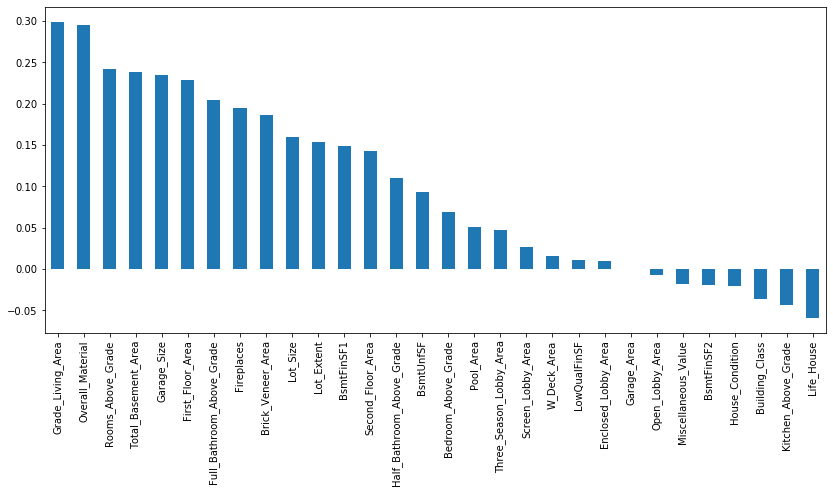

In [141]:
#sns.heatmap(corr)
corr_with_sale_price = all_numeric.corr()["Sale_Price"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop("Sale_Price").plot.bar()
plt.show()


In [144]:
new=all[["Grade_Living_Area","Overall_Material","Rooms_Above_Grade","Total_Basement_Area",
         "Garage_Size","First_Floor_Area","Full_Bathroom_Above_Grade",
        "Fireplaces","Brick_Veneer_Area","Lot_Size","Sale_Price"]]

In [145]:
new.shape

(2918, 11)

In [147]:
new_x=new.iloc[:,0:10]
new_y=new.iloc[:,-1]

In [148]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_x,new_y,test_size = 0.2,random_state= 101)
new_x_train.shape,new_x_test.shape,new_y_train.shape,new_y_test.shape

((2334, 10), (584, 10), (2334,), (584,))

In [149]:
lin.fit(new_x_train,new_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
pr=lin.predict(new_x_test)
pr

array([ 83470.82484392,  38282.25585453,  18658.02618873,  82360.18996869,
       159760.84378895,  92363.54947992,  77790.9584763 , 120185.00365485,
        66219.39890951, 112941.13743008,  97481.62147954,  57698.27451987,
        83253.02928458,  66875.63122297,  34670.53927053,  90787.90861811,
        64221.03388264,  91250.74132424,  78610.68434112,  61971.33112426,
       121606.34833543,  94077.6479544 ,  56166.51145069,  83890.60611757,
       157119.06812901, 169442.20432536,  89795.98354789, 125575.27975739,
       112344.76968298,  54399.39778163,  95581.26949895,  75355.62128948,
       109184.53769302, 100999.91978449, 129992.61155469,  58302.2010944 ,
        97817.97272696,  62539.15979751, 108914.47678275,  53434.25154064,
       153734.32078973,  65834.94026719,   9031.39539765, 107042.91383833,
        57953.00415245, 130700.17504832,  56446.66810231,  64867.28898792,
        89947.4524404 , 143641.69616947,  84641.1760435 ,  97786.47199606,
        86079.06903671, 1

In [151]:
R2=lin.score(new_x_train,new_y_train)
R2

0.1480616562817555

In [153]:
Adjr2=1-(((1-r2)*(2918-1))/(2918-11-1))
Adjr2

0.8739748501196145

In [155]:
mse=metrics.mean_squared_error(new_y_test,pr)
mse

10130155402.658142

In [156]:
mse1=metrics.mean_squared_error(new_y_test,pr)
mse1

10130155402.658142

In [157]:
rmse1=np.sqrt(mse1)
rmse1

100648.67312914832

In [158]:
error=new_y_test-pr
abs=np.abs(error)

In [159]:
mape1=np.mean(abs/new_y_test)*100
mape1

inf

In [160]:
acc=(100-mape1)
acc

-inf